In [20]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')

In [3]:
df.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [5]:
df.isna().sum()

sex      0
exang    0
num      0
dtype: int64

In [6]:
df.shape

(238, 3)

In [10]:
X = df.drop(['num'],axis=1)

In [35]:
X.head()

,sex,exang
0,1,1
1,1,1
2,1,0
3,1,0
4,1,0


In [11]:
y = df.num

In [54]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: num, dtype: int64

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=10)

In [71]:
clf= tree.DecisionTreeClassifier(criterion = 'entropy')

In [72]:
parametr = { 'max_depth' : range(1,10)}

In [73]:
grid_search_cv_clf = GridSearchCV(clf,parametr,cv=5)

In [74]:
grid_search_cv_clf.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': range(1, 10)})

In [75]:
best_clf = grid_search_cv_clf.best_estimator_

In [76]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=1)

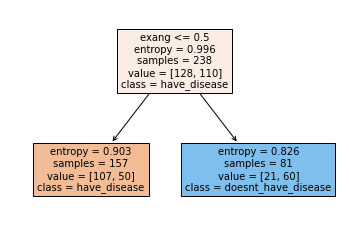

In [77]:
tree.plot_tree(best_clf,
               feature_names=list(X_train),
               class_names=['have_disease','doesnt_have_disease'],
               filled=True,
               fontsize = 10);

In [78]:
Entropy_root = best_clf.tree_.impurity[0] 

In [80]:
Samples_root  = best_clf.tree_.n_node_samples[0]

In [81]:
Samples_left = best_clf.tree_.n_node_samples[1]

In [82]:
Entropy_left = best_clf.tree_.impurity[1]

In [84]:
Samples_right = best_clf.tree_.n_node_samples[2]

In [85]:
Entropy_right = best_clf.tree_.impurity[2]

In [86]:
IG_root = Entropy_root - (Samples_left/Samples_root*Entropy_left + Samples_right/Samples_root*Entropy_right)

In [87]:
IG_root

0.11939340343891591

In [51]:
another_clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [52]:
another_clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

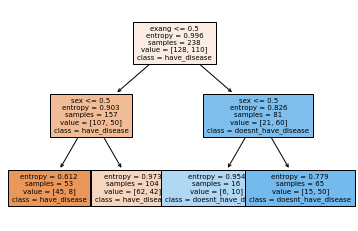

In [53]:
tree.plot_tree(another_clf,
               feature_names=list(X_train),
               class_names=['have_disease','doesnt_have_disease'],
               filled=True,
               fontsize = 7);

In [56]:
# количество рассматриваемых вариантов в каждом листе
another_clf.tree_.n_node_samples

array([238, 157,  53, 104,  81,  16,  65], dtype=int64)

In [57]:
# Энтропия в каждом листе дерева
another_clf.tree_.impurity

array([0.99587   , 0.90271134, 0.61219613, 0.97315604, 0.82562653,
       0.954434  , 0.77934984])

In [62]:
Entropy_root = another_clf.tree_.impurity[0] 

In [64]:
Samples_root  =another_clf.tree_.n_node_samples[0]

In [63]:
Samples_left = another_clf.tree_.n_node_samples[1]

In [65]:
Entropy_left = another_clf.tree_.impurity[1]

In [66]:
Samples_right = another_clf.tree_.n_node_samples[4]

In [67]:
Entropy_right = another_clf.tree_.impurity[4]

In [69]:
# рассчитываем IG для корня дерева
IG_root = Entropy_root - (Samples_left/Samples_root*Entropy_left + Samples_right/Samples_root*Entropy_right)

In [70]:
IG_root

0.11939340343891591